In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
dataset_path = "raw_data/Corn seeds/raw"
train_path = "raw_data/Corn seeds/train"
val_path = "raw_data/Corn seeds/val"
test_path = "raw_data/Corn seeds/test"

In [3]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [4]:
train_dir = "raw_data/Corn seeds/train"
val_dir = "raw_data/Corn seeds/test"
test_dir = "raw_data/Corn seeds/test"

In [5]:
train_df = pd.DataFrame(columns=["path", "class"])
val_df = pd.DataFrame(columns=["path", "class"])
test_df = pd.DataFrame(columns=["path", "class"])

In [6]:
# img = load_img(f'{train_path}/broken/3.jpg')
# x = img_to_array(img)/255
# img

In [7]:
# x.shape

In [8]:
# train_ratio = 0.7
# val_ratio = .15

# for class_folder in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_folder)
#     images = os.listdir(class_path)
#     random.shuffle(images)

#     # Calculate the split index
#     split_index = int(train_ratio * len(images))
#     val_len = int(len(images) * (1-val_ratio))

#     # Split the images into training and testing sets
#     train_images = images[:split_index]
#     val_images = images[split_index:val_len]
#     test_images = images[val_len:]

#     # Create class folders in the training and testing directories
#     train_class_path = os.path.join(train_path, class_folder)
#     val_class_path = os.path.join(val_path, class_folder)
#     test_class_path = os.path.join(test_path, class_folder)
#     os.makedirs(train_class_path, exist_ok=True)
#     os.makedirs(val_class_path, exist_ok=True)
#     os.makedirs(test_class_path, exist_ok=True)

#     # Move images to the respective class folders in training and testing
#     for image in train_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(train_class_path, image)
#         shutil.copy(src, dest)

#     for image in val_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(val_class_path, image)
#         shutil.copy(src, dest)

#     for image in test_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(test_class_path, image)
#         shutil.copy(src, dest)

In [9]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [10]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,MaxPool2D,Rescaling,RandomFlip

2024-11-30 14:31:40.600155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 14:31:40.600198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 14:31:40.601113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 14:31:40.606243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-30 14:31:41.223026: W tensorflow/compiler/tf2

# tentativa

In [21]:
model = Sequential()

model.add(layers.Rescaling(1/255, input_shape=(192,192,3)))

model.add(layers.RandomFlip(mode='horizontal'))
model.add(layers.RandomFlip(mode='vertical'))
model.add(layers.RandomZoom(-.3,-.3))
model.add(layers.RandomContrast(.5))

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(4,4), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(4,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 192, 192, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 192, 192, 3)       0         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 192, 192, 3)       0         
                                                                 
 random_contrast_1 (RandomC  (None, 192, 192, 3)       0         
 ontrast)                                                        
                                                                 
 conv2d_8 (Conv2D)           (None, 192, 192, 32)      2432      
                                                      

# Model 69,84%

In [22]:
# model = Sequential()

# model.add(layers.Rescaling(1/255, input_shape=(192,192,3)))

# model.add(layers.RandomFlip(mode='horizontal'))
# model.add(layers.RandomFlip(mode='vertical'))
# model.add(layers.RandomZoom(-.3,-.3))
# model.add(layers.RandomContrast(.25))

# model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(4,4), padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(4,4), padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Flatten())

# model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(64, activation='relu'))

# model.add(layers.Dense(4,activation="softmax"))
# model.summary()

In [23]:
# opt = optimizers.SGD(learning_rate=.001, momentum=0.9)
# model.compile(loss="categorical_crossentropy",
#               optimizer=opt,
#               metrics=["accuracy"])

In [24]:
adam = optimizers.Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [25]:
batch_size = 32
train_ds = image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['broken', 'discolored', 'pure', 'silkcut'],
    image_size=(192,192),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode = 'categorical',
    class_names = ['broken', 'discolored', 'pure', 'silkcut'],
    image_size=(192,192),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode = 'categorical',
    class_names = ['broken', 'discolored', 'pure', 'silkcut'],
    image_size=(192,192),
    batch_size=batch_size
)

Found 4882 files belonging to 4 classes.
Found 1048 files belonging to 4 classes.
Found 1048 files belonging to 4 classes.


In [26]:
MODEL = "model_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_accuracy",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                        factor=1/3,
                                        patience=15,
                                        verbose=1,
                                        min_lr=1e-6)

EarlyStopper = callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=45,
                                       verbose=0,
                                       restore_best_weights=True)

In [27]:
%%time
history = model.fit(
        train_ds,
        epochs=900,
        validation_data=val_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/900
153/153 [==============================] - 14s 73ms/step - loss: 1.3043 - accuracy: 0.3966 - val_loss: 1.6296 - val_accuracy: 0.2309 - lr: 0.0010
Epoch 2/900
153/153 [==============================] - 9s 58ms/step - loss: 1.1834 - accuracy: 0.4644 - val_loss: 1.2910 - val_accuracy: 0.3406 - lr: 0.0010
Epoch 3/900
153/153 [==============================] - 9s 58ms/step - loss: 1.1423 - accuracy: 0.4799 - val_loss: 1.5695 - val_accuracy: 0.4294 - lr: 0.0010
Epoch 4/900
153/153 [==============================] - 11s 72ms/step - loss: 1.1073 - accuracy: 0.5104 - val_loss: 1.2031 - val_accuracy: 0.4599 - lr: 0.0010
Epoch 5/900
153/153 [==============================] - 9s 59ms/step - loss: 1.0976 - accuracy: 0.5094 - val_loss: 1.1326 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 6/900
153/153 [==============================] - 9s 60ms/step - loss: 1.0669 - accuracy: 0.5344 - val_loss: 1.1338 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 7/900
153/153 [==============================] - 9

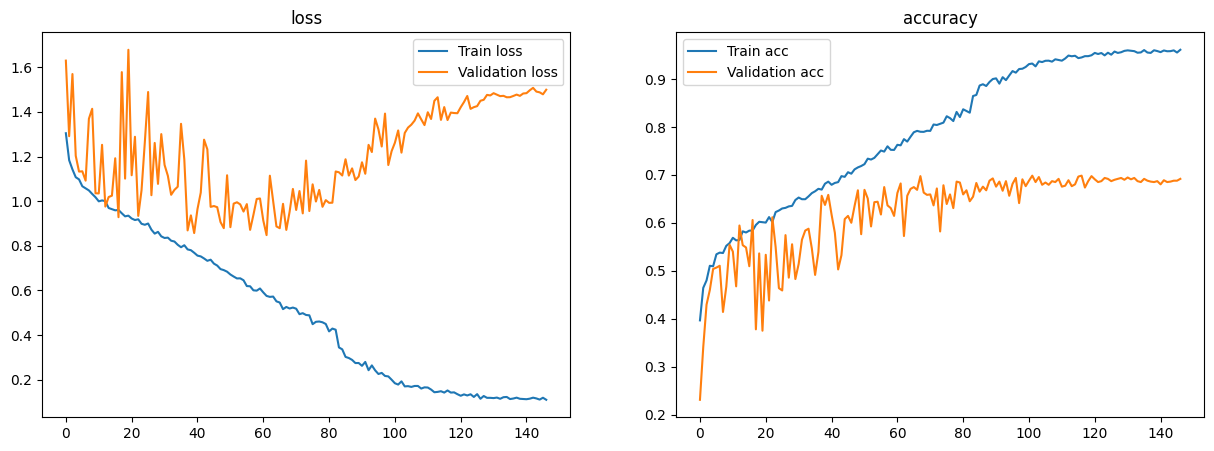

In [28]:
plot_history(history)

In [29]:
model.evaluate(test_ds)

33/33 [==============================] - 1s 22ms/step - loss: 1.3168 - accuracy: 0.6985


[1.316811203956604, 0.6984732747077942]

In [20]:
# model.save("model_corn_val_loss:0.0.8671-val_accuracy:0.6985")